<a href="https://colab.research.google.com/github/Eyu-148/CS254ML-HW/blob/main/Eyu_Chen_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6

# Planar data classification using 1-hidden Layer Neural Network.

In this assignment you will learn how to:
- Build a Multi layer perceptron neural network from scratch.
- Implement forward propagation
- Implement cost function and determine the error.
- Test debugging skills for your neural network.
- This assignment is an introduction to assignment #7 in which you will train the implemented network end to end using the backpropagation algorithm
<br>

<b>Note: In this assignment we will implement the neural netwrok using vectorization (which should be your default choice anyways). It will save you time and the code will run much faster.</b>


In [2]:
# import the python file from github
# !pip install requests
import requests
url='https://raw.githubusercontent.com/Eyu-148/CS254ML-HW/main/data_utils.py'
r = requests.get(url)
with open('data_utils.py', 'w') as f:
  f.write(r.text)
import data_utils

In [3]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt

# import useful function from data_utils.py (found on the same directoy) to help you managing your data. 
from data_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

In [4]:
# Important: Use seed of 0. this is important to make sure that we all have same expected asnwers.
np.random.seed(0)

## Step1: Loading dataset

The following line will load the planar dataset. The feature space is two dimensional and the classification is binary.

In [5]:
features, labels = load_planar_dataset()

## Step2: Data Visualization
The code below will visualize the loaded dataset and separate the two classes by color. The data look like a "flower". The goal of this assignment is to build a non-linear model that will accurately predict the class of a given data point.

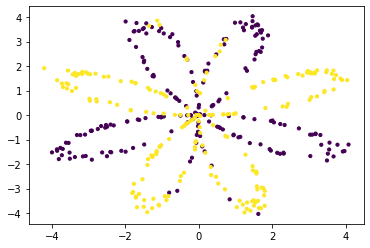

In [6]:
plt.scatter(*features, c=labels.ravel(), s=10)

## Question 1 - 10 points
Can a neural netwrok with no hidden layers calssify this Planar dataset (shown in the figure above)? why or why not ?

A hidden layer is required iff the dataset must be separated non-linearly. And in this case, the 2 classes cannot be separated with a linear decision boundary, thus hiddden layers should be necessary to deal with the data before it can be separated linearly. 

## Step3: Give the data a look

Before diving deep into the math, lets try to get a better sense of what our data looks like. <br>
- What is the shape of our features?<br>
- What is the shape of our labels?<br>
- How many training examples do you have? 


In [8]:
shape_X = features.shape 
shape_Y = labels.shape
m = labels.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have %d training sample!' % (m), 'and %d features!' % (features.shape[0]), 'and binary labels!')

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have 400 training sample! and 2 features! and binary labels!


## Step4: Neural Network model

Let us build a neural network with one hidden layer to see if it eventally can perform non-linear separtion (your will train this network in your assignment #7). 
For your convenience, a diagram and the mathematical formulas of the network you will build are given below (pay a careful attention to the details):


![Network.PNG](attachment:Network.PNG)


## Question 2 - 10 points
Can you design different neural network for the same dataset (i.e. same input and output)? can you suggest another network architecture?

If we want a more accurate separation of this dataset, then the architecture we are using now is better to solve with non-linearly separatable data. However, the single-layer preceptron could be used if a linear decision boundary is needed. 

## Step 5: Neural Network Implementation

### Mathematically:
First, note that this network has three inputs (features + the bias). One-hidden layer with four neurons and one output. The forward propagation as explained in the lectures is given by these equations (X is the input and Y is the output):

$$a^{(1)} =  X \tag{1}$$
$$z^{(2)} =  W^{1} a^{(1)} \tag{2}$$ 
$$a^{(2)} = g(z^{(2)}) + a^{(2)}_{0}\tag{3}$$
$$z^{(3)} = W^{2} a^{(2)}\tag{4}$$
$${h}_{(w)}(X) = a^{(3)} = g(z^{ (3)})\tag{5}$$

Given the predictions on all the examples, you can also compute the cost (cross-entropy cost in this case) $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{(3) (i)}\right) + (1-y^{(i)})\log\left(1- a^{(3) (i)}\right)  \large  \right) \small \tag{6}$$

In here we are parallelizing the network, so note that X could contain more than one example, X's dimension is the (num_features) * (num_samples).<br><br>
### High Level Network Instructions
To build a neural network, you need the following building blocks beforehand:
1. Layer definition
2. Initialization of parameters
3. Forward propagation
4. Cost computation
5. Backward propagation (Assignment 7)
6. Update of parameters from gradient (Assignment 7)

<br>The building blocks will be explained as we go along in the assignment.

First, we are going to build a three layer MLP network. In this step, you must define the sizes of your layers. These sizes are determined by the input and output space of your network (as detailed in course notes). The size of your hidden layer can be set to four nodes for now.<br><br> Define three variables named:<br>- input_layer_size (the size of the input layer)<br>- hidden_layer_size (the size of the hidden layer)<br>- output_layer_size (the size of the output layer)

In [9]:
def layerSizes(X):
    """
    X -- input data
    """
    input_layer_size = X.shape[0]
    hidden_layer_size = 4
    output_layer_size = 1
    
    """
    Returns:
    input_layer_size -- the size of the input layer
    hidden_layer_size -- the size of the hidden layer
    output_layer_size -- the size of the output layer
    """
    
    return input_layer_size, hidden_layer_size, output_layer_size

In [10]:
input_layer_size, hidden_layer_size, output_layer_size = layerSizes(features)
print("The size of the input layer is: " + str(input_layer_size))
print("The size of the hidden layer is: " + str(hidden_layer_size))
print("The size of the output layer is: " + str(output_layer_size))

The size of the input layer is: 2
The size of the hidden layer is: 4
The size of the output layer is: 1



## Question 3 - 10 points
You need to initialize neural network with random values. Implement the initialize_parameters function.<br> Here you need to define the W1 and W2 and store them in the 'parameters' dictionary. refer to the lecture notes to figure out the diminsions (the weights should be same for all samples, so W1 and W2 are independents of the sample number).

In [11]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    input_size-- size of the input layer
    hidden_size -- size of the hidden layer
    output_size-- size of the output layer
    """
    
    Weight1 = np.random.rand(hidden_size, input_size+1) # have the W1 diminsions defined here, the return should be a matrix initalized randomly.  
    Weight2 = np.random.rand(output_size, hidden_size+1) # have the W2 diminsions defined here, the return should be a matrix initalized randomly.
    
    parameters = {'Weight1' : Weight1, 'Weight2' : Weight2}
    
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix 1
                    W2 -- weight matrix 2 
    """
    
    return parameters

In [12]:
parameters = initialize_parameters(*layerSizes(features))
#Write you code here
print("Weight1 = " + str(parameters["Weight1"].shape))
print("Weight2 = " + str(parameters["Weight2"].shape))

Weight1 = (4, 3)
Weight2 = (1, 5)


## Question 4 - 10 points
What are the expected diminsions for $z^{(2)}, $$a^{(2)}, $$z^{(3)},$$a^{(3)}$, and Y? for your calculations count the bias as it is included in X, so X diminsions will be 3x400, we will implement the code that add the bias to X in the next question.

First of all, we know that the initial training set X is 2x400 without bias, and 3x400 with bias term, the expected dimensions for others should be:
1. Y(the output matrix) --> 1x400
2. z2 (given by weight1*X) --> 4x400
3. a2 (activation in the hidden layer) --> 4x400 initially, and 5x400 with bias term
4. z3 (given by weight2*a2) --> 1x400, which is the same with output

## Question 5 - 30 points

 In this part forward propagation will be implemented. It will propagate the gradient in the forward pass from one layer to another.

At first, look at the mathematical representation of the classifier. For this assignment we are asking you to use **tanh** activation function for the hidden layer and **sigmoid** activation function for the output layer. (For neural network in general you can use any non-linear activation function).

Do the following by filling the code cell below in the designated areas:


- Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters function) by using parameters dictionary.

- Implement Forward Propagation. Compute $z^{(2)}, a^{(2)}, z^{(3)}$ and $a^{(3)}$ (the vector of all your predictions on all the examples in the training set).

Hint: The best way to debug your code is to print out the diminsions at the each output, X diminsions are 3x400, y diminsions are 1x400.


In [42]:
def forward_prop(X, parameters):
    """
    X -- input data
    parameters -- python dictionary containing your parameters (output of initialization function)
    """
    
    # Retrieve your weights from the "parameters" dictionary
    Weight1 = parameters['Weight1'] 
    Weight2 = parameters['Weight2'] 
    
   # Add bias term to X -> 3*400 matrix
    one = np.ones(X.shape[1])  
    X = np.vstack((one, X))
    
    # Compute pass from layer 1 to layer 2 and activation
    z2 = Weight1.dot(X)
    a2 = np.tanh(z2)
    
    # add bias term to a2
    one = np.ones(a2.shape[1])
    a2  = np.vstack((one, a2))
    
    # Compute pass from layer 2 to layer 3 and activation
    z3 = Weight2.dot(a2)
    a3 = sigmoid(z3)
    
    
    #The values will be needed for the backpropagation which are stored in cache. Later, it will be given to back propagation.
    cache = {"z2": z2,
             "a2": a2,
             "z3": z3,
             "a3": a3}
    """
    Returns:
    a3 -- The sigmoid output of the second activation
    cache -- a dictionary containing "z2", "a2", "z3" and "a3"
    """
    return np.array(a3), cache

### Test forward propagation functionality
This code is for sanity check. In class, we only fed one sample to our neural net as input at a time. If your matrix math is done correctly, you are able to feed multiple samples to your network. Lets try it out.

In [43]:
# test input data 
np.random.seed(0)
X_test = np.random.randn(2, 2)

# Use these weights in order to obtain the desired output
parameters = {
    'Weight1': 
        np.array([
            [-0.00416758, -0.00056267,-0.00056127],
            [-0.02136196,  0.01640271,-0.00056123],
            [-0.01793436, -0.00841747,-0.00036123],
            [ 0.00502881, -0.01245288,-0.00026117]
        ]),
     'Weight2': 
        np.array([
             [-0.01057952, -0.00909008,  0.00551454,  0.02292208, 0.02292223]
     ])
}


a3, cache = forward_prop(X_test, parameters)

# Note: we use the mean function to simplify the process of identifying mathing output.
print("Your output:\n",'z2: \n', cache['z2'], '\na2: \n', cache['a2'], '\nz3: \n', cache['z3'],'\na3: \n', cache['a3'])

# expected output:
# Your output:
#  z2: 
#  [[-0.0057095  -0.00565048]
#  [ 0.00702398 -0.01605595]
#  [-0.03313677 -0.02211215]
#  [-0.01719434 -0.00053955]] 
# a2: 
#  [[ 1.00000000e+00  1.00000000e+00]
#  [-5.70943356e-03 -5.65042245e-03]
#  [ 7.02386643e-03 -1.60545743e-02]
#  [-3.31246440e-02 -2.21085460e-02]
#  [-1.71926449e-02 -5.39553721e-04]] 
# z3: 
#  [[-0.01164227 -0.01113583]] 
# a3: 
#  [[0.49708947 0.49721607]]

Your output:
 z2: 
 [[-0.0057095  -0.00565048]
 [ 0.00702398 -0.01605595]
 [-0.03313677 -0.02211215]
 [-0.01719434 -0.00053955]] 
a2: 
 [[ 1.00000000e+00  1.00000000e+00]
 [-5.70943356e-03 -5.65042245e-03]
 [ 7.02386643e-03 -1.60545743e-02]
 [-3.31246440e-02 -2.21085460e-02]
 [-1.71926449e-02 -5.39553721e-04]] 
z3: 
 [[-0.01164227 -0.01113583]] 
a3: 
 [[0.49708947 0.49721607]]


## Question 6 - 30 points 

You have computed  $a^{(3)}$ (in the Python variable "`a3`"), which contains $a^{(3)(i)}$ for every example. You will need these values to compute cost as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{(3) (i)}\right) + (1-y^{(i)})\log\left(1- a^{(3) (i)}\right) \large{)} \small\tag{7}$$

 Implement compute_cost() to compute the value of the cost $J$. note that the diminsion of Y is 1x400, and it should be same for a3.

In [71]:
def compute_cost(a3, Y):
    """
    Computes the cross-entropy cost given in equation (7) or in whichever way you choose.
    
    Arguments:
    a3 -- The sigmoid output of the second activation
    Y -- "true" labels vector of shape 
    """
    m = Y.shape[1]  # number of example
    ones = np.ones(m)

    # Compute the cross-entropy cost
    cost = - (Y.dot(np.log(a3)) + (ones - Y).dot(np.log(ones - a3))) / m

    return cost

This code is for sanity check to check if you implemented the compute_cost correctly. 

In [73]:
# test function for compute_cost
np.random.seed(0)
Y_true = np.random.randn(1, 3)

a3 = np.array([ 0.5002307,  0.49985831,  0.50023963])
print("Your output:\ncost = %.16f" % compute_cost(a3, Y_true))

# Desired output:
# cost = 0.6925866228882112

Your output:
cost = 0.6925866228882112


<b>In the next assignment, you will use this code to continue the nerual network implementation and build the backpropagation algorithm. </b>